In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [77]:
data = np.loadtxt("ex1data2.txt", delimiter = ',')
X = data[:, 0:2]
Y = data[:, 2]
m = len(Y)
X = X.reshape(m, 2)
Y = Y.reshape(m, 1)

In [50]:
theta = np.zeros((3, 1))

In [51]:
def featureNormalize(X):
    X_norm = X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [28]:
def computeCostMulti(X, y, theta):
    m = len(y)
    predictH = np.dot(X, theta)
    S = np.dot((predictH - y).T, (predictH - y))
    res = S / 2 / m
    return res

In [52]:
X_norm, mu, sigma = featureNormalize(X)
X = np.concatenate((np.ones((m, 1)), X_norm), axis = 1)
cost = computeCostMulti(X, Y, theta)
print(cost)

65591548106.45744


In [39]:
def gradientDescentMuiti(X, y, theta, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        temp_theta = theta
        predictH = np.dot(X, theta)
        S = np.dot(X.T, predictH - y)
        temp_theta = theta - S * alpha / m
        theta = temp_theta
        J_history[i,0] = computeCostMulti(X, y, theta)
    
    return theta, J_history

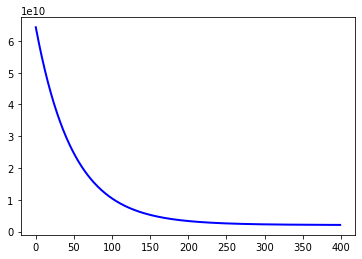

In [53]:
alpha = 0.01
num_iters = 400
theta = np.zeros((3, 1))

theta, J_his = gradientDescentMuiti(X, Y, theta, num_iters)
plt.plot(J_his, 'b-', linewidth = 2)

In [75]:
x_nor = ([1650, 3] - mu) / sigma
predictX = np.concatenate((np.asarray([1]), x_nor)).reshape(1, 3)
predictY = np.dot(predictX, theta)
print(predictY)

[[289221.54737122]]


In [82]:
def normalEqn(X, y):
    m = X.shape[1]
    theta = np.zeros((m, 1))
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta

In [84]:
X2 = np.concatenate((np.ones((m, 1)), X), axis = 1)
theta2 = normalEqn(X2, Y)
pdx = np.array([1, 1650, 3]).reshape(1, 3)
pdy = np.dot(pdx, theta2)
print(pdy)

[[293081.4643349]]
